# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [227]:

import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [228]:
df.info()
# Check for missing values and data types



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [229]:
df.describe().T
# Summary statistics



,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [230]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [231]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable


<Axes: xlabel='job', ylabel='Count'>

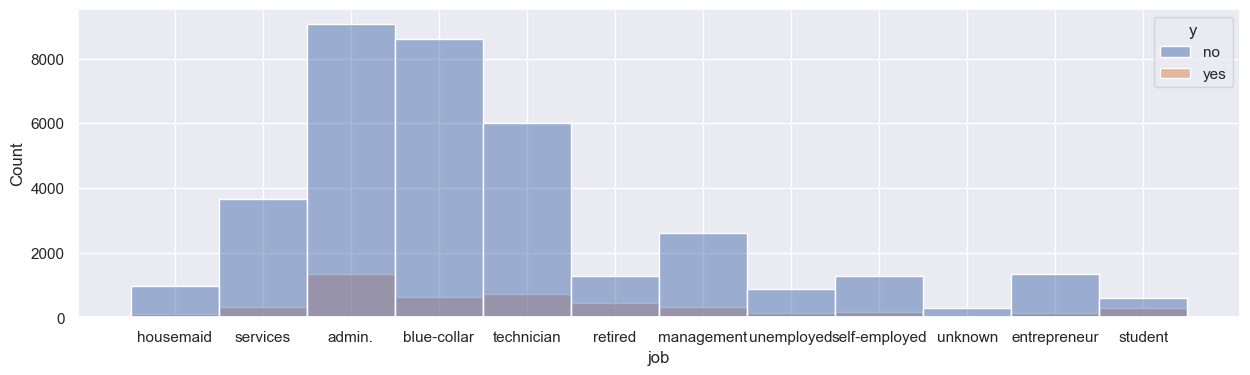

In [232]:
sns.set(rc={'figure.figsize':(15,4)})
sns.histplot(data=df,x='job',hue='y')

<Axes: xlabel='education', ylabel='Count'>

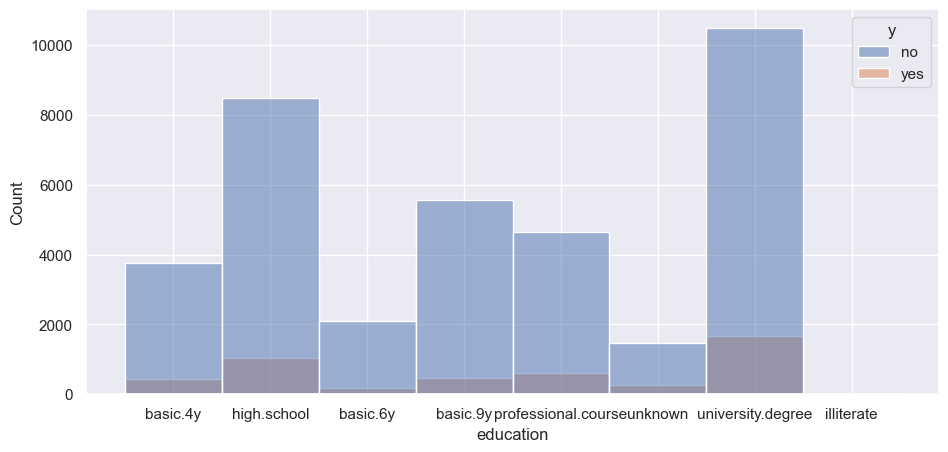

In [233]:
sns.set(rc={'figure.figsize':(11,5)})
sns.histplot(data=df,x='education',hue='y')

Text(0.5, 1.0, 'Marital Status')

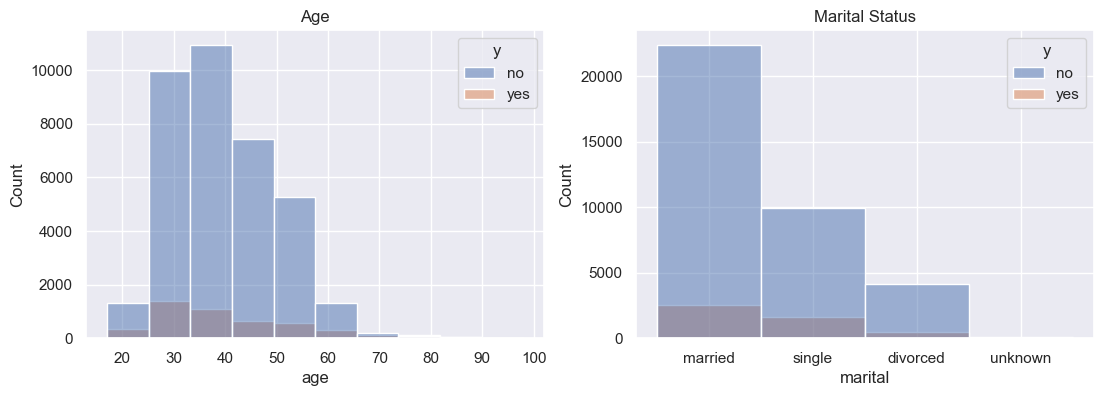

In [234]:
fig, axes = plt.subplots(1,2, figsize=(13,4))
sns.histplot(data=df, x='age', bins=10, hue='y', ax=axes[0])
axes[0].set_title('Age')
sns.histplot(data=df,x='marital',hue='y', ax=axes[1])
axes[1].set_title('Marital Status')


Text(0.5, 1.0, 'Credit in Default')

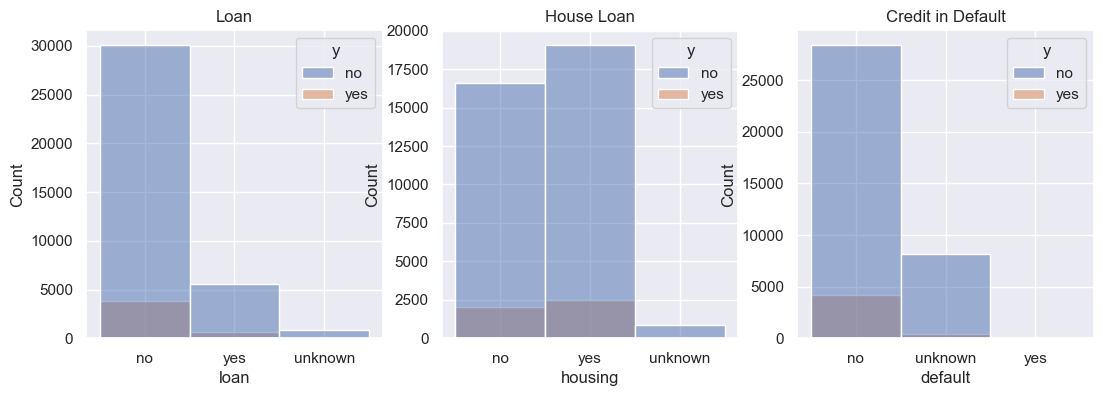

In [235]:
fig, axes = plt.subplots(1,3, figsize=(13,4))
sns.histplot(data=df,x='loan',hue='y', ax=axes[0])
axes[0].set_title('Loan')
sns.histplot(data=df,x='housing',hue='y', ax=axes[1])
axes[1].set_title('House Loan')
sns.histplot(data=df,x='default',hue='y',ax=axes[2])
axes[2].set_title('Credit in Default')

Text(0.5, 1.0, 'Contact Type')

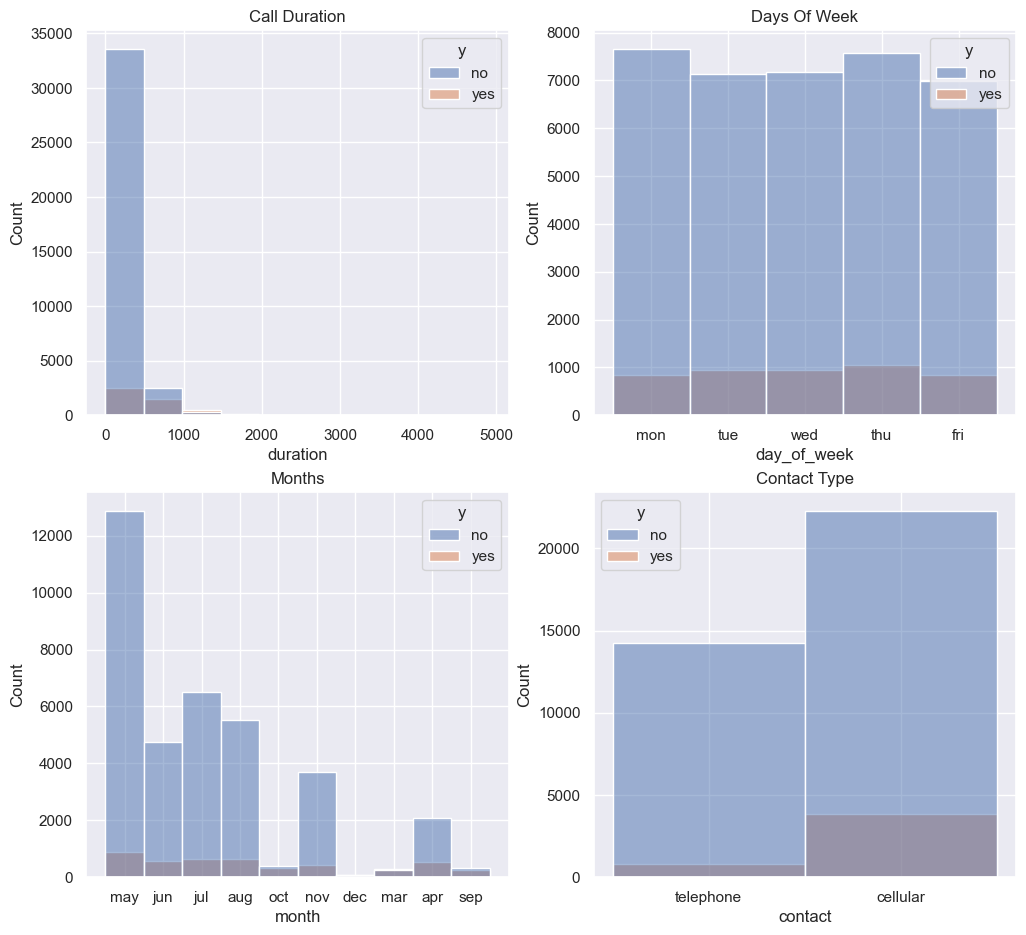

In [236]:
fig, axes = plt.subplots(2, 2, figsize=(12,11))
sns.histplot(data=df, x='duration', bins=10, hue='y', ax=axes[0, 0])
axes[0, 0].set_title('Call Duration')
sns.histplot(data=df,x='day_of_week',hue='y', ax=axes[0,1])
axes[0,1].set_title('Days Of Week')
sns.histplot(data=df,x='month',hue='y',ax=axes[1,0])
axes[1,0].set_title('Months')
sns.histplot(data=df,x='contact',hue='y',ax=axes[1,1])
axes[1,1].set_title('Contact Type')

Text(0.5, 1.0, 'No. of contacts performed previously')

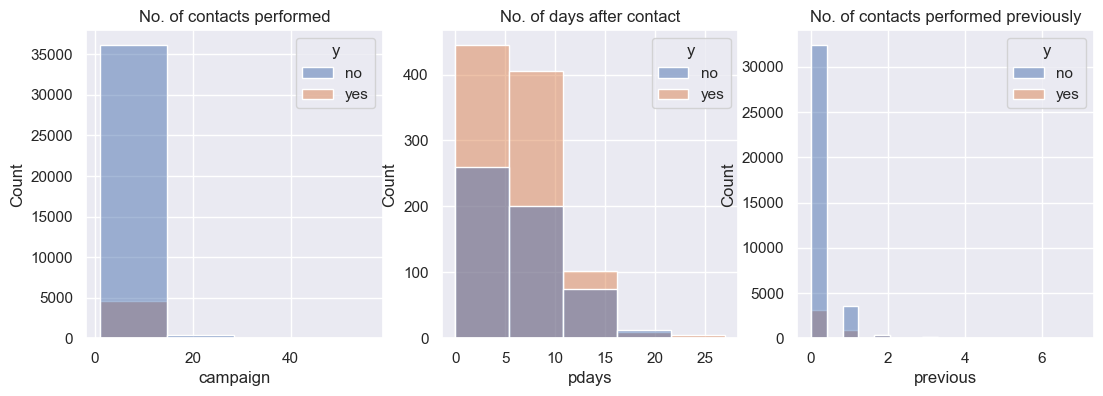

In [237]:
fig, axes = plt.subplots(1,3, figsize=(13,4))
sns.histplot(data=df,x='campaign',bins=4,hue='y', ax=axes[0])
axes[0].set_title('No. of contacts performed')
sorted_df=df.sort_values(by='pdays',ascending=True).query('pdays<500')
sns.histplot(data=sorted_df,x='pdays',bins=5 ,hue='y', hue_order=['no','yes'], ax=axes[1])
axes[1].set_title('No. of days after contact')
sns.histplot(data=df,x='previous',hue='y',ax=axes[2])
axes[2].set_title('No. of contacts performed previously')

Text(0.5, 1.0, 'No. of employees')

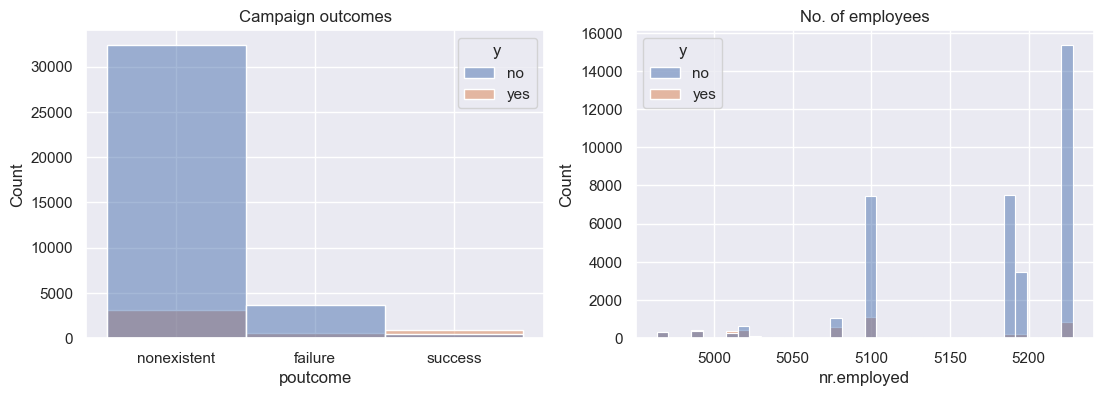

In [261]:
fig, axes = plt.subplots(1,2, figsize=(13,4))
sns.histplot(data=df,x='poutcome',hue='y', ax=axes[0])
axes[0].set_title('Campaign outcomes')
sns.histplot(data=df,x='nr.employed',hue='y', ax=axes[1])
axes[1].set_title('No. of employees')

Text(0.5, 1.0, 'Consumer confidence index')

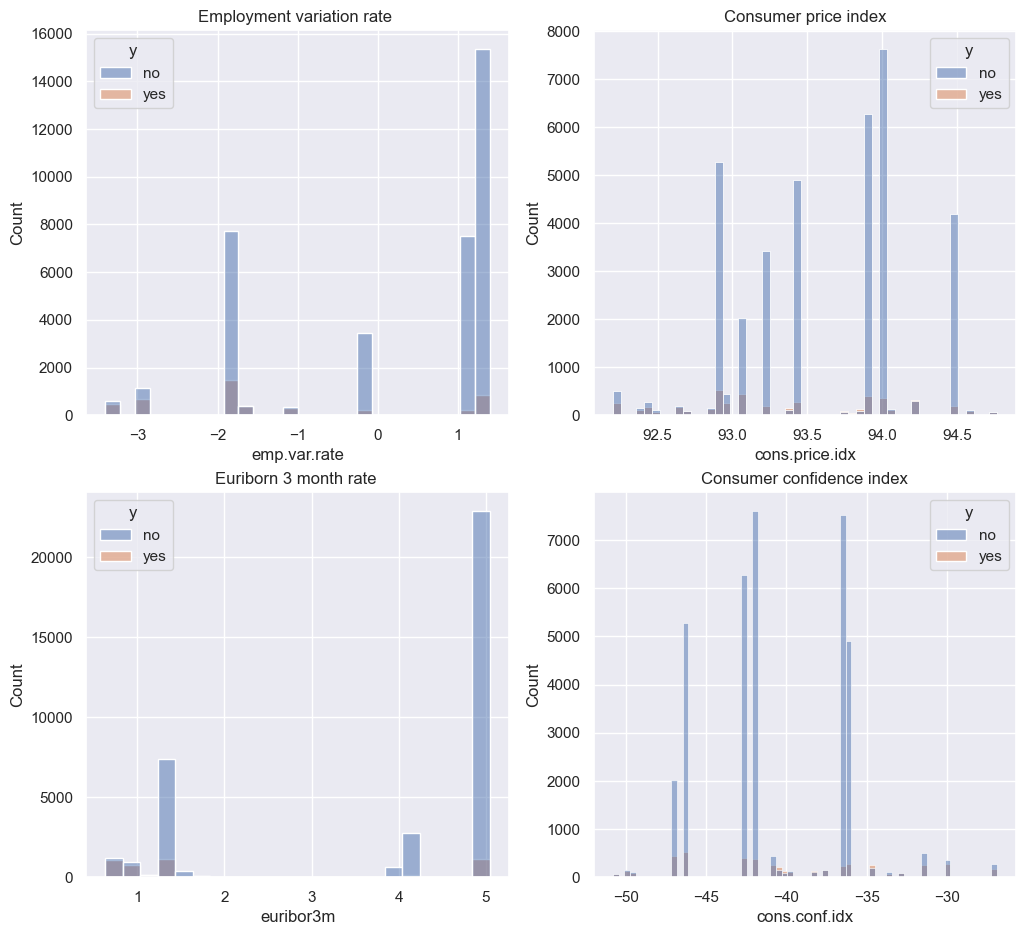

In [257]:
fig, axes = plt.subplots(2,2, figsize=(12,11))
sns.histplot(data=df,x='emp.var.rate',hue='y', ax=axes[0,0])
axes[0,0].set_title('Employment variation rate ')
sns.histplot(data=df,x='cons.price.idx',hue='y',ax=axes[0,1])
axes[0,1].set_title('Consumer price index')
sns.histplot(data=df,x='euribor3m',hue='y', ax=axes[1,0])
axes[1,0].set_title('Euriborn 3 month rate ')
sns.histplot(data=df,x='cons.conf.idx',hue='y',ax=axes[1,1])
axes[1,1].set_title('Consumer confidence index')

<Axes: >

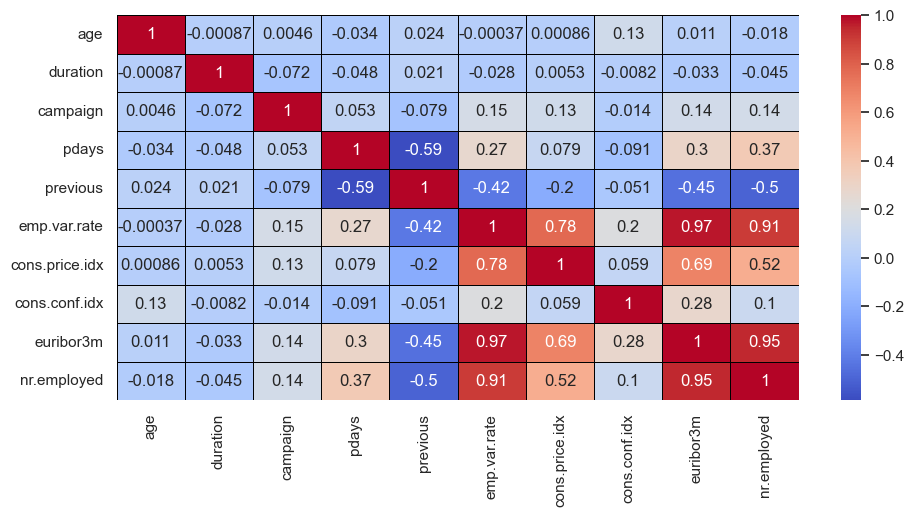

In [239]:

# Correlation matrix for numerical features

sns.heatmap(df.corr(numeric_only='True'),annot=True,cmap='coolwarm',linewidth=0.5,linecolor='black')


## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Rate of term deposits subscribtion only increses if repeatedly called within 20 days of previous call 
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
